In [39]:
#coding:utf-8
%matplotlib inline
'''
低通滤波
https://blog.csdn.net/horizon_zore/article/details/53129802
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

src = cv2.cvtColor(cv2.imread('datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [40]:
def ideal_low_pass_filter(src):
    if type(src) == type(None) or len(src.shape) > 2:
        print('gray image is needed')
        return None
    rows,cols = src.shape
    # 调整图像加速傅里叶变换
    M = cv2.getOptimalDFTSize(rows)
    N = cv2.getOptimalDFTSize(cols)
    
#     padded = np.zeros_like(src)
    padded = cv2.copyMakeBorder(src,0,M - rows,0,N - cols,
                       cv2.BORDER_REPLICATE)
     # 记录傅里叶的实况和虚部
    planes = [np.float32(padded),np.zeros((rows,cols),dtype=np.float32)]
    
    complexImg = cv2.merge(planes,2)
    
    # 执行傅里叶变换
    complexImg = cv2.dft(complexImg,flags=cv2.DFT_COMPLEX_OUTPUT)
    
    # 获取图像
    mag = complexImg.copy()
    m_r,m_c = mag.shape[0],mag.shape[1]
    mag = mag[0:m_r & -2,0:m_c & -2]
    
    cx = m_c // 2
    cy = m_r // 2
    
    # 调整频域
    tmp = np.zeros((cy,cx),np.float32)
    q0 = mag[0:cy,0:cx]
    q1 = mag[cx:m_r,0:cx]
    q2 = mag[0:cy,m_c:cx]
    q3 = mag[m_r:cy,m_c:cx]
    
    tmp = q0
    q0 = q3
    q3 = tmp
    
    tmp2 = np.zeros((cy,cx),np.float32)
    tmp2 = q1
    q1 = q2
    q2 = tmp2
    
    D0 = 60
    for y in range(m_r):
        for x in range(m_c):
            d = np.sqrt(math.pow((y - cy),2) + math.pow((x - cx),2))
            if d > D0:
                mag[y,x] = 0
                
    tmp = np.zeros((cy,cx),np.float32)
    tmp2 = np.zeros((cy,cx),np.float32)
    tmp = q0
    q0 = q3
    q3 = tmp
    
    tmp2 = q1
    q1 = q2
    q2 = tmp2
    
#     inv_dft = np.zeros_like(mag)
#     inv_dft_cvt = np.zeros_like(mag)
    
    inv_dft = cv2.idft(mag)
    inv_dft_cvt = cv2.convertScaleAbs(inv_dft)
    return inv_dft_cvt

<class 'numpy.ndarray'>
(480, 640, 2)


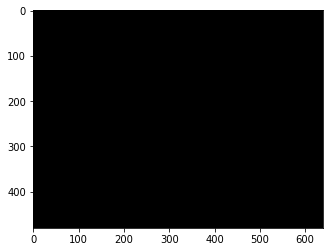

In [43]:
result = ideal_low_pass_filter(gray)
channels = cv2.split(result)
print(type(result))
print(result.shape)
plt.imshow(channels[1],cmap='gray')